In [1]:
import numpy as np
import scipy.constants as cc

from tabulate import tabulate

import matplotlib.pyplot as plt

from RachbaJunction import RachbaJunction
from RachbaJunction.utilities import *

# evanescent spinor phase

<IPython.core.display.Javascript object>


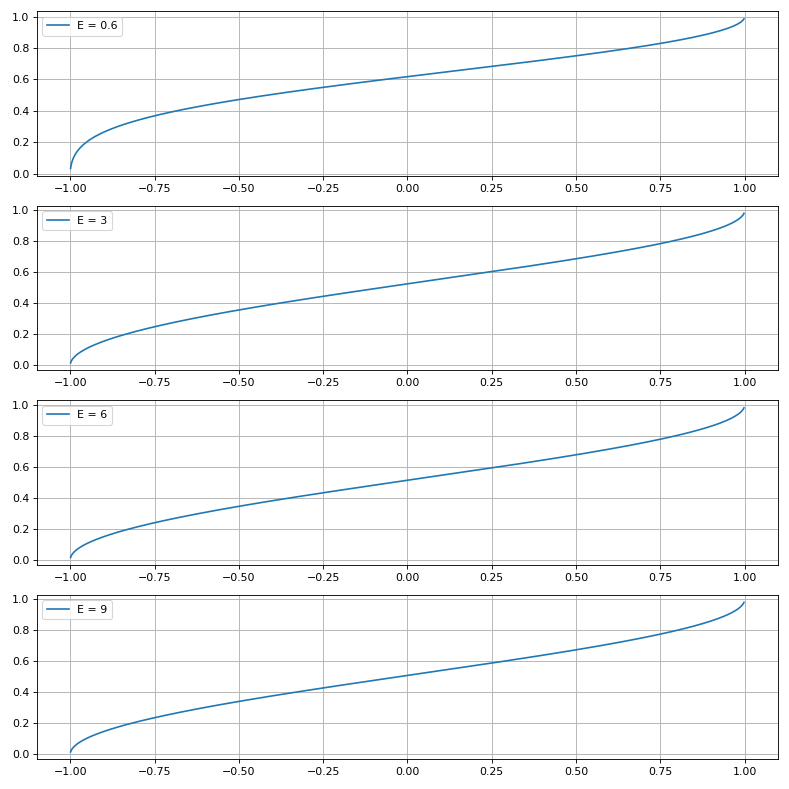

In [21]:
alpha = [-4, 4]
# alpha = [4, -4]
profile = [0]
junction = RachbaJunction([profile, alpha])

def kk(ee, al):
    i = 3
    c = 0
    junction.E_so = al
    wf = junction.get_WF(0, ee)
    res = wf[:, i]
    return np.angle(res[c])/np.pi
#     i = 2
#     junction.E_so = al
#     junction.prepare_rashba_WF(0, ee)
#     kk = junction.wave_length[i]
#     res = junction.omega_q(0, kk, junction.band[i])
#     return np.angle(res[0])/np.pi

    
r = np.arange(-0.999, 0.999, 0.001)
p = [0.6, 3, 6, 9]

res = make_grid(r, p, [kk])

%matplotlib notebook
# plt.rcParams['text.usetex'] = True


fig, axs = plt.subplots(len(res.keys()), 1, figsize=(10, 10), dpi=100, tight_layout=True, facecolor='white')

for indd, keyy in enumerate(res.keys()):
    axs[indd].plot(r, res[keyy][0], label=f"E = {keyy}")
#     axs[indd].plot(r, res[i][1], label=f"expansion E_so = {i}")
    axs[indd].grid(True)
    axs[indd].legend()

# fig.suptitle(r"$$E_{so, ext}/ h_\perp = (3, 0, 3) $$", fontsize=16)
      
# plt.savefig("T(E) at cconstant E_SO(3 regions).png", transparent = False)
plt.show()

# reflection coefficient and evanescent spinor phases

<IPython.core.display.Javascript object>


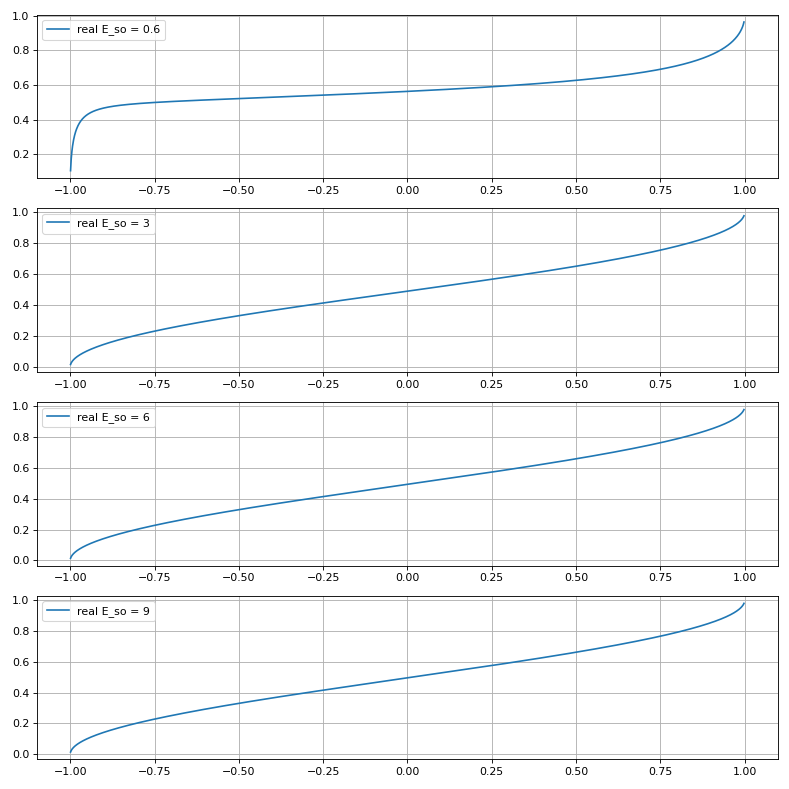

In [5]:
alpha = [-4, 4]
# alpha = [4, -4]
profile = [0]
junction = RachbaJunction([profile, alpha])

def kk(ee, al):
    alpha = [-al, al]
    junction.alpha_profile = alpha
    S = junction.get_scattering_matrix(ee)
    ev_coef = S.C
    
    i = 3
    c = 0
    junction.E_so = al
    wf = junction.get_WF(0, ee)
    w_res = wf[:, i]
    
    res = np.angle(ev_coef[3, 0]*w_res[0])/np.pi
    return res

    
r = np.arange(-0.999, 0.999, 0.001)
p = [0.6, 3, 6, 9, ]

res = make_grid(r, p, [kk])

%matplotlib notebook
# plt.rcParams['text.usetex'] = True


fig, axs = plt.subplots(len(res.keys()), 1, figsize=(10, 10), dpi=100, tight_layout=True, facecolor='white')

for indd, keyy in enumerate(res.keys()):
    axs[indd].plot(r, res[keyy][0], label=f"E = {keyy}")
#     axs[indd].plot(r, res[i][1], label=f"expansion E_so = {i}")
    axs[indd].grid(True)
    axs[indd].legend()

# fig.suptitle(r"$$E_{so, ext}/ h_\perp = (3, 0, 3) $$", fontsize=16)
      
# plt.savefig("T(E) at cconstant E_SO(3 regions).png", transparent = False)
plt.show()

# spinor angle

<IPython.core.display.Javascript object>


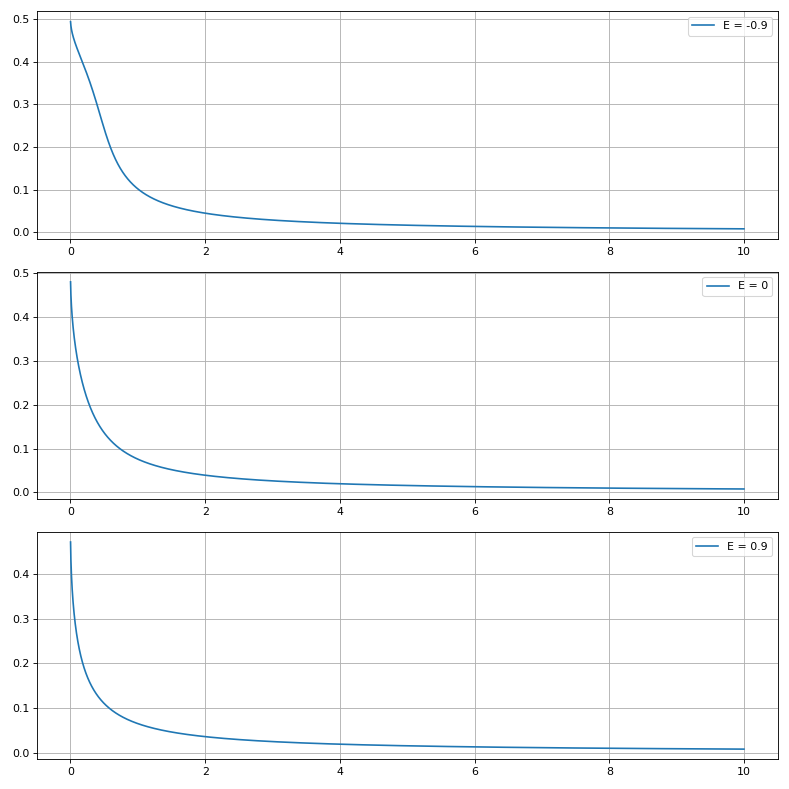

In [59]:
from scipy.optimize import curve_fit


alpha = [-4, 4]
# alpha = [4, -4]
profile = [0]
junction = RachbaJunction([profile, alpha])

def kk1(al, ee):
    i = 0
    c = 0
    junction.E_so = al
#     wf = junction.get_WF(0, ee)
    junction.prepare_rashba_WF(0, ee)
    tt = junction.wave_length[i][c]
    
    res = np.arctan(1/tt)/np.pi
    return res

# def kk2(ee, al):
#     i = 3
#     c = 0
#     junction.E_so = al
#     junction.prepare_rashba_WF(0, ee)
#     tt = junction.wave_length[i][c]
    
#     res = np.arctan(1/tt)/np.pi
#     return res

    
r = np.arange(0.001, 10, 0.001)
p = [-0.9, 0, 0.9]

res = make_grid(r, p, [kk1])

%matplotlib notebook
# plt.rcParams['text.usetex'] = True


fig, axs = plt.subplots(len(res.keys()), 1, figsize=(10, 10), dpi=100, tight_layout=True, facecolor='white')

for indd, keyy in enumerate(res.keys()):
    axs[indd].plot(r, res[keyy][0], label=f"E = {keyy}")
    

#     coeff = curve_fit(lambda t,a,b: a*np.exp(b*t),  r, np.array(res[keyy][0], dtype=np.float64), p0=(0.5, -1.3851))[0]
#     print(coeff)
# #     p0=(0.5, -1.3851)
#     fitt = coeff[0] * np.exp(coeff[1] * r)
#     axs[indd].plot(r, fitt)
    
#     axs[indd].plot(r, res[i][1], label=f"expansion E_so = {i}")
    axs[indd].grid(True)
    axs[indd].legend()

# fig.suptitle(r"$$E_{so, ext}/ h_\perp = (3, 0, 3) $$", fontsize=16)
      
# plt.savefig("T(E) at cconstant E_SO(3 regions).png", transparent = False)
plt.show()